In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

## 随机性的检验

1、图检验法

根据纯随机性序列的均值为0、协方差为0的性质，可以观察时序图是否满足均值为零、具有高度纯随机性的条件；观察ACF自相关图，如果序列不与历史时刻序列存在自相关关系，则可认为是随机性序列。这种方法具有较为粗糙，不太准确，常用作预检验。
比如下图，随机波动，不具有任何明显或不明显的历史相关性，故为纯随机性时间序列。

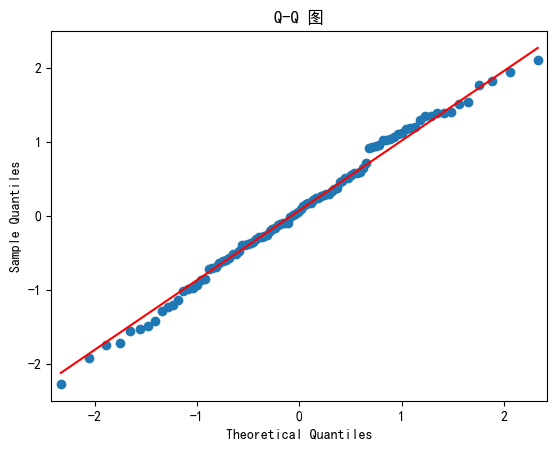

In [2]:
import statsmodels.api as sm
data = np.random.normal(loc=0, scale=1, size=100)
fig, qq_ax = plt.subplots()
sm.qqplot(data, line = 's', ax = qq_ax)
qq_ax.set_title('Q-Q 图')
plt.show()

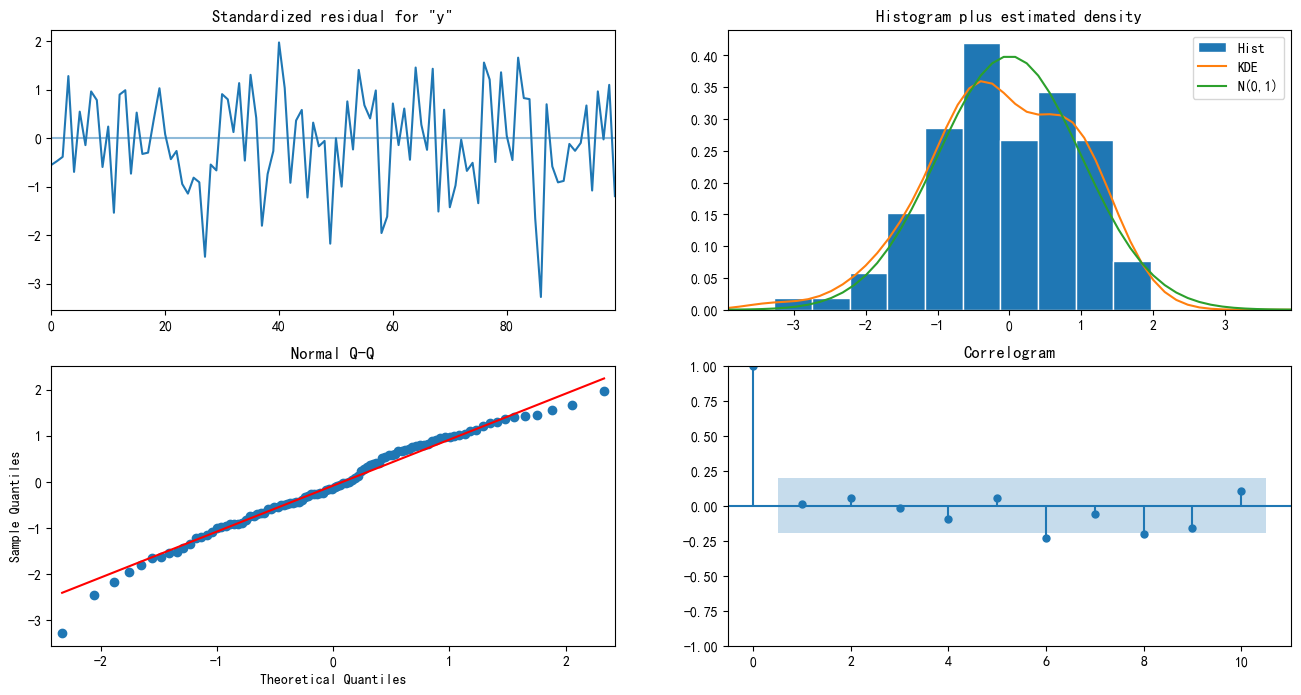

In [3]:
data = np.random.randn(100)
model = sm.tsa.statespace.SARIMAX(data, order=(1, 0, 1))
mini_aic_model = model.fit()
mini_aic_model.plot_diagnostics(figsize=(16, 8))
plt.show()

2、统计检验法

随机性的检验方法是由数学家Box 和Ljung提出的Box-Ljung检验，观察QLB统计量是否服从卡方分布。当P值大于显著性水平α，可认为序列是白噪声序列。Box和Pierce提出的QBP统计量检验适用于大样本场合（n>=50），在小样本场合检验效果不太精确。基于QLB检验统计量的Box-Ljung检验适用性更好。

Q统计量和LB统计量，其计算公式分别如下：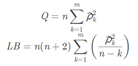

其中，nnn为序列的观察期数，mmm为指定延迟期数，kkk为延迟阶数。

In [4]:
from statsmodels.stats.diagnostic import acorr_ljungbox

## 平稳性的检验
时序图检验和ACF图检验等图检验法常用于平稳性的初步判定，主观性和经验性较大；ADF单位根检验和PP/KPSS检验等统计检验法应用较多，是较为客观的检验方法，较为准确可靠。

1、图检验法

时序图检验
根据平稳时间序列均值、方差均为常数的性质，平稳时间序列的时序图（折线图）应该始终在一个常数值附近随机波动无明显的趋势性或周期性，而且波动的范围有界。

如左下图所示，如果时间序列是平稳的，那么序列应该是围绕某一个均值上下随机波动，而下图中的序列明显具有一定的增长趋势，因此，可以断定该序列肯定不是平稳时间序列。如右下图所示，数据基本上是围绕着0轴上下波动，在0轴上方和下方的波动幅度基本一致。我们可以初步认定，该时间序列是平稳的。

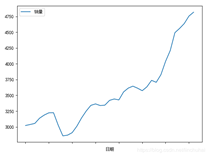
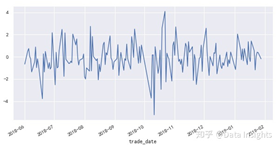

- PP图检验

Q-Q图的结果与P-P图非常相似，只是P-P图是用分布的累计比，而Q-Q图用的是分布的分位数来做检验。QQ图和P-P图一样，如果数据为正态分布，则在Q-Q正态分布图中，数据点应基本在图中对角线上

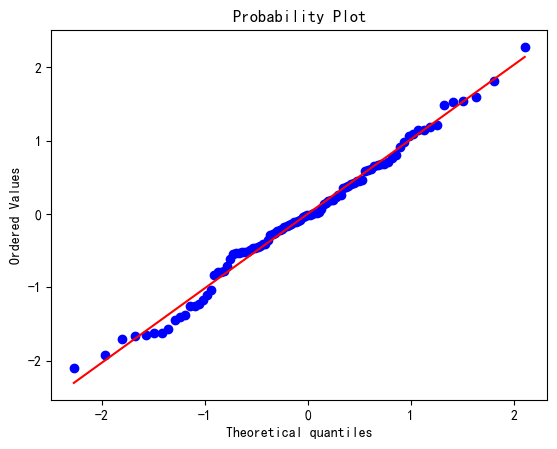

In [5]:
import scipy.stats as scs
data = np.random.normal(loc=0, scale=1, size=100)
fig, pp_ax = plt.subplots()
scs.probplot(data, sparams=(data.mean(), data.std()), plot=pp_ax)
plt.show()

- ACF图检验

自相关系数和之后阶数之间的关系图。ACF长期位于零轴的一边——单调趋势序列；ACF呈现正弦波动规律——周期变化规律；一直较小且在两倍的标准差范围内——平稳性。

如左下图所示，该时间序列随着阶数的递增，自相关系数先减后增，因此，可以判断该时间序列不是平稳时间序列。如右下图所示，，自相关系数数迅速由1减小到0附近，之后随着阶数的上升在0轴上下小幅波动，这基本上是符合平稳性的要求的。

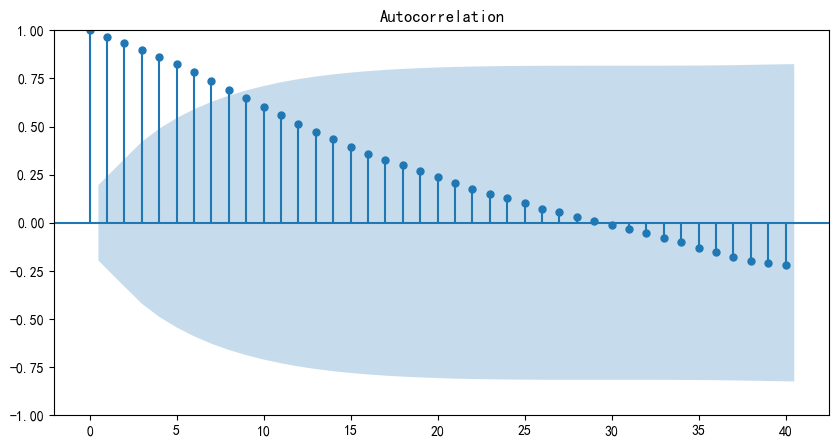

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
np.random.seed(42)
data = np.random.randn(100).cumsum()  # 生成累积和数据，这通常是非平稳的
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(data, ax=ax, lags=40)  # lags参数决定了延迟的数量
plt.show()

2、统计检验法

1979年，Dickey和Fuller提出的增广DF(augmented Dickey-Fuller)检验，即ADF检验。

1988年，Phillips和Perron提出的单位根检验方法，即PP检验法。

1992年，Kwiatkowski、Phillips、Schmidt和Shin提出的KPSS检验

ADF检验（Augmented Dickey-Fuller Test）

ADF检验是检测时间序列单位根的一种方法，常用于判断时间序列是否具有非平稳性。这里是如何进行ADF检验并解释其输出：

In [7]:
from statsmodels.tsa.stattools import adfuller

# 生成随机游走数据
np.random.seed(42)  # 设置随机种子以获得可重复的结果
n_samples = 100
tpa_train = np.random.normal(0, 1, n_samples).cumsum()  # 随机游走模型

# 假设tpa_train是你的时间序列数据
result = adfuller(tpa_train, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.358332
p-value: 0.602081
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


KPSS检验（Kwiatkowski-Phillips-Schmidt-Shin Test）

KPSS检验是另一种检验时间序列平稳性的方法，与ADF检验不同，KPSS检验的原假设是序列是平稳的。

In [8]:
from statsmodels.tsa.stattools import kpss

# 生成随机游走数据
np.random.seed(42)  # 设置随机种子以获得可重复的结果
n_samples = 100
tpa_train = np.random.normal(0, 1, n_samples).cumsum()  # 随机游走模型
# 同样假设tpa_train是你的时间序列数据
statistic, p_value, n_lags, critical_values = kpss(tpa_train)

print('KPSS Statistic: %f' % statistic)
print('p-value: %f' % p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 1.257304
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Museum\AppData\Local\Temp\ipykernel_10068\1918608373.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(tpa_train)


_InterpolationWarning: The test statistic is outside of the range of p-values available in the look-up table. The actual p-value is smaller than the p-value returned._

不必当心这条警告，这是预期的。警告信息表明测试统计量超出了预定义的 p-value 查找表的范围，这通常意味着实际的 p-value 比返回的值要小。这种情况通常在非平稳时间序列中出现，尤其是在如随机游走这样的明显非平稳序列中。

## 时间序列分析建模

流程框图如下：

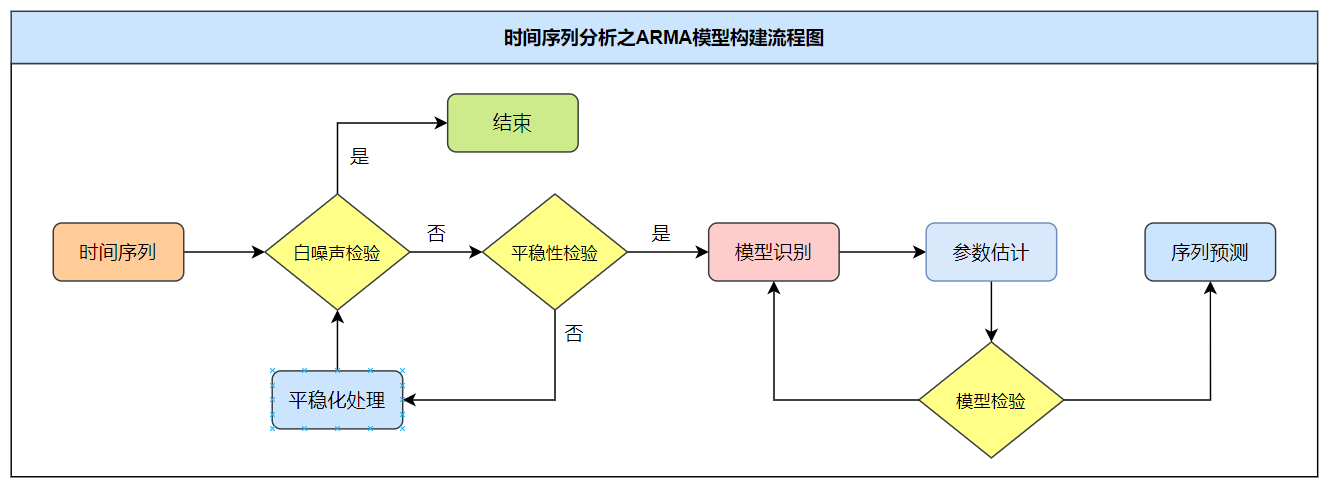

- **步骤1**  对时间序列做白噪声检验。通常来说，只有那些序列值之间具有密切的相关关系，历史数据对未来的发展具有一定的影响，才可以用来建模以挖掘历史数据中的有效信息，并预测未来的发展。纯随机性序列不具有任何分析价值。
- **步骤2**     对序列做平稳性检验，只有平稳的时间序列才可以用ARMA建模；若序列是非平稳的，则对其平稳化处理。
- **步骤3**     ARMA模型建模，包含模型识别、参数估计、模型检验等三个过程。
- **步骤4**  利用构建的拟合模型，可以进行动态结构分析以考察研究对象的运行规律，调整输入变量以控制研究对象的发展、对未来变化进行序列预测。